In [67]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

# 1. Data Exploration

In [68]:
df = pd.read_csv("Input\data.csv")
df.head(3)

,Label,Vendor,Usage,Recycle,MAINPD_ID,EQP1,Recipe1,CAST_ID,MAINPD_ID_1,MAINPD_ID_2
0,B,FK,0,1,CEPA07SAC1,KP11,DI4,F140,CEBIH1PA02,CEBIHPA002
1,G,FK,2,1,CEPA07SAC1,KP13,DI4,F400,CEPACONT01,CE003PAMON
2,G,FK,1,1,CEPA003H40,KP22,DI3,F451,CEPACONT01,CE003PAMON


In [69]:
df.describe()

,Usage,Recycle
count,877.000000,877.000000
mean,0.638540,0.989738
std,0.929242,0.267978
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,1.000000,1.000000
max,6.000000,3.000000


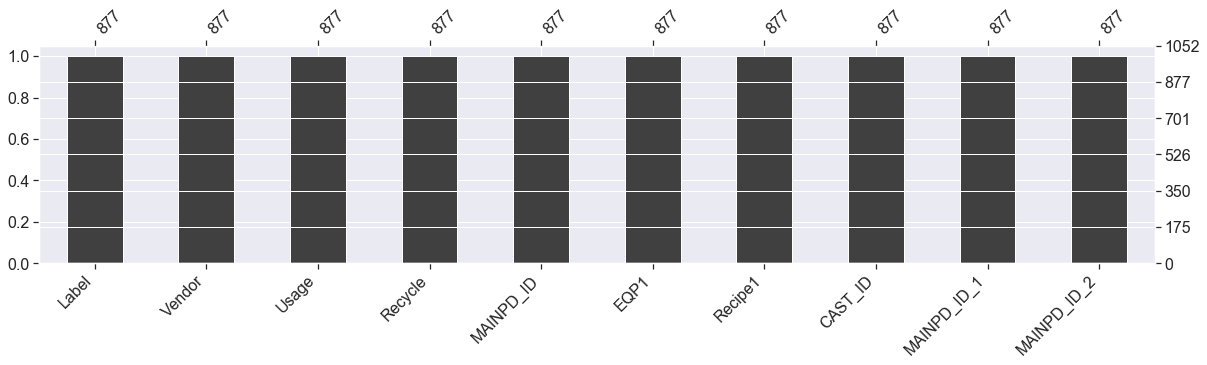

In [70]:
#Data Distribution
import missingno as msno
msno.bar(df,figsize=(20,4))

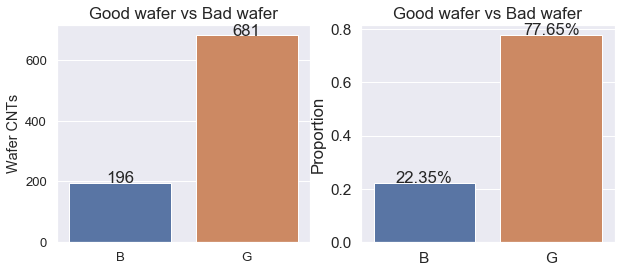

In [71]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
pal = sns.color_palette()
sns.set(font_scale=1.4)
sumb = (df.Label == 'B').sum()
sumg = (df.Label == 'G').sum()
ax = sns.barplot(x=['B','G'],y=df.groupby(['Label'],as_index=False).count()['Vendor'], palette=pal)
ax.set(ylabel='Wafer CNTs', title='Good wafer vs Bad wafer')
for p, uniq in zip(ax.patches, [sumb, sumg]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.001,
            '{}'.format(round(uniq, 0)),
            ha="center")

plt.subplot(1,2,2)
sns.set(font_scale=1.4)
mean = (df.Label == 'B').mean()
ax = sns.barplot(['B', 'G'], [mean, 1-mean], palette=pal)
ax.set(ylabel='Proportion', title='Good wafer vs Bad wafer')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.001,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 10 columns):
Label          877 non-null object
Vendor         877 non-null object
Usage          877 non-null int64
Recycle        877 non-null int64
MAINPD_ID      877 non-null object
EQP1           877 non-null object
Recipe1        877 non-null object
CAST_ID        877 non-null object
MAINPD_ID_1    877 non-null object
MAINPD_ID_2    877 non-null object
dtypes: int64(2), object(8)
memory usage: 68.6+ KB


# 2. Data Preprocess
## OneHot Enocding

In [73]:
y = df['Label']
features = ['Vendor','Usage', 'Recycle', 'MAINPD_ID','EQP1','Recipe1','MAINPD_ID_1','MAINPD_ID_2']
x = df[features]

In [74]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
LE2 = LabelEncoder()
LE3 = LabelEncoder()
LE4 = LabelEncoder()
#LE5 = LabelEncoder()
LE6 = LabelEncoder()
LE7 = LabelEncoder()


x['Vendor'] = LE1.fit_transform(x['Vendor'])
x['MAINPD_ID'] = LE2.fit_transform(x['MAINPD_ID'])
x['EQP1'] = LE3.fit_transform(x['EQP1'])
x['Recipe1'] = LE4.fit_transform(x['Recipe1'])
#x['CAST_ID'] = LE5.fit_transform(x['CAST_ID'])
x['MAINPD_ID_1'] = LE6.fit_transform(x['MAINPD_ID_1'])
x['MAINPD_ID_2'] = LE7.fit_transform(x['MAINPD_ID_2'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [75]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877 entries, 0 to 876
Data columns (total 8 columns):
Vendor         877 non-null int64
Usage          877 non-null int64
Recycle        877 non-null int64
MAINPD_ID      877 non-null int64
EQP1           877 non-null int64
Recipe1        877 non-null int64
MAINPD_ID_1    877 non-null int64
MAINPD_ID_2    877 non-null int64
dtypes: int64(8)
memory usage: 54.9 KB


# 3. Feature Importance Analysis

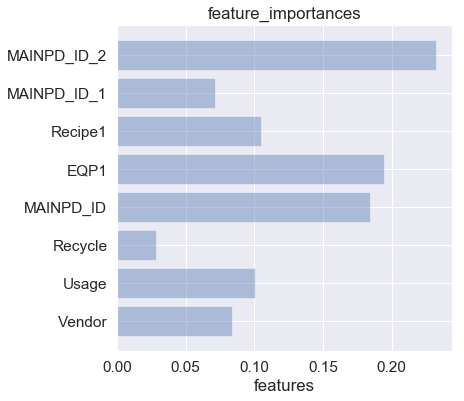

In [76]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x, y)

#sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(6,6))
y_pos = np.arange(len(features))
plt.barh(y_pos, model.feature_importances_, align='center', alpha=0.4)
plt.yticks(y_pos, x)
plt.xlabel('features')
plt.title('feature_importances')
plt.show()

In [77]:
model.feature_importances_

array([0.08401037, 0.10052509, 0.02850906, 0.18447398, 0.19411632,
       0.10485338, 0.07134875, 0.23216304])

## 3.1 Mainpd_ID2 Study (前世2)
The correlation of Mainpd_id2 & Label is **0.2224**. Worse route: **CEPA003H40**

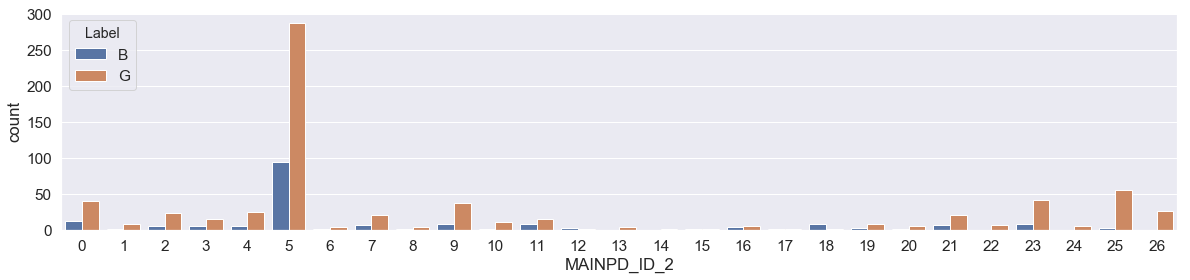

In [78]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(x['MAINPD_ID_2'], hue=y)

### Worse MainPD_ID:

In [80]:
list(LE2.inverse_transform([9]))

D:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['CEPA003H40']

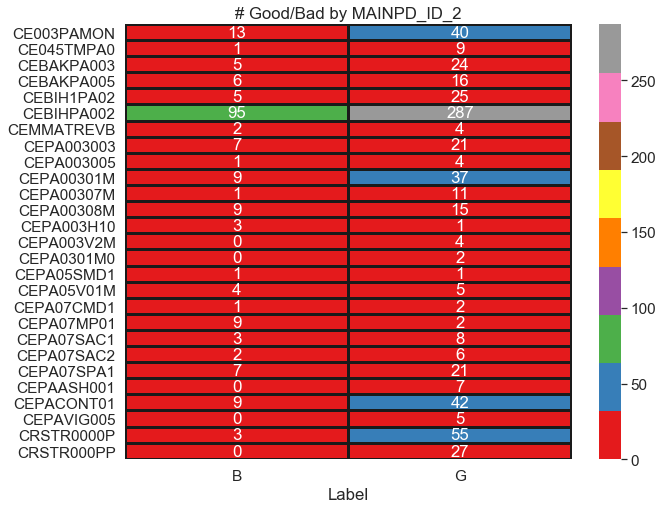

In [81]:
yc_fe = df[["Label","MAINPD_ID_2"]]

plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(yc_fe["Label"],yc_fe["MAINPD_ID_2"]).transpose(),
            annot=True,fmt="d",cmap=sns.color_palette("Set1"),linewidth=2,linecolor="k")

plt.ylabel("")
plt.title("# Good/Bad by MAINPD_ID_2")
plt.show()

## 3.2 EQP_ID Study (SP)
The correlation of EQP_ID & Label is **0.2079**. Worse tool: **KPSP11**, **KPSP13**, **KPSP12**

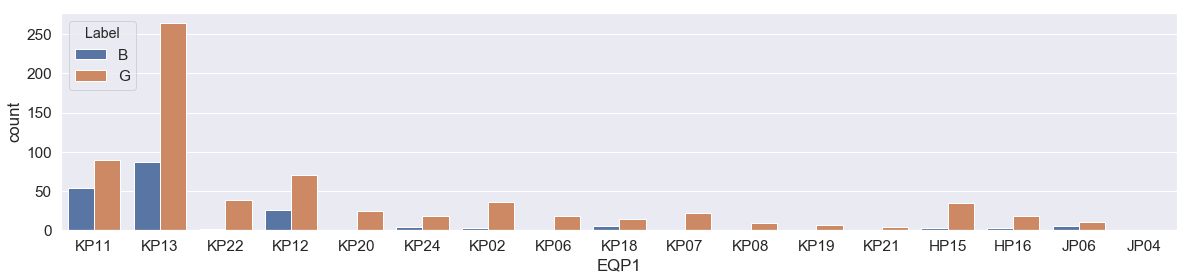

In [82]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(df['EQP1'], hue=y)

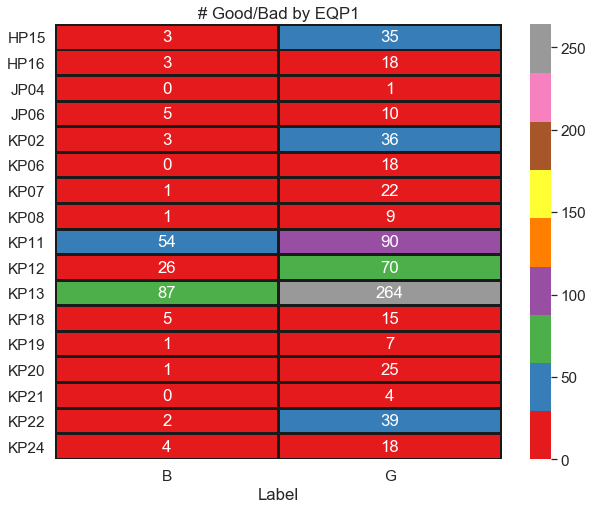

In [83]:
yc_fe = df[["Label","EQP1"]]

plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(yc_fe["Label"],yc_fe["EQP1"]).transpose(),
            annot=True,fmt="d",cmap=sns.color_palette("Set1"),linewidth=2,linecolor="k")

plt.ylabel("")
plt.title("# Good/Bad by EQP1")
plt.show()

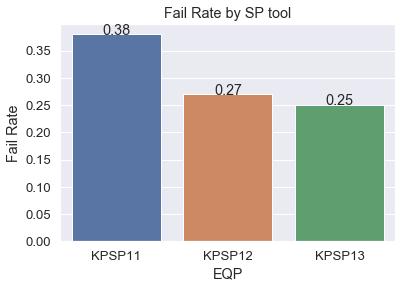

In [84]:
a = round(54/(54+90),2)
b = round(26/(26+70),2)
c = round(87/(87+264),2)

cols = ['KPSP11','KPSP12','KPSP13']
failrate = [a,b,c]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, failrate, palette=pal)
ax.set(xlabel='EQP', ylabel='Fail Rate', title='Fail Rate by SP tool')
for p, uniq in zip(ax.patches, failrate):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height,uniq,ha="center") 

### Worse tool: KPSP11 (fail rate: 0.36)

## 3.3 Mainpd_ID Study
The correlation of Mainpd_id & Label is **0.1888**

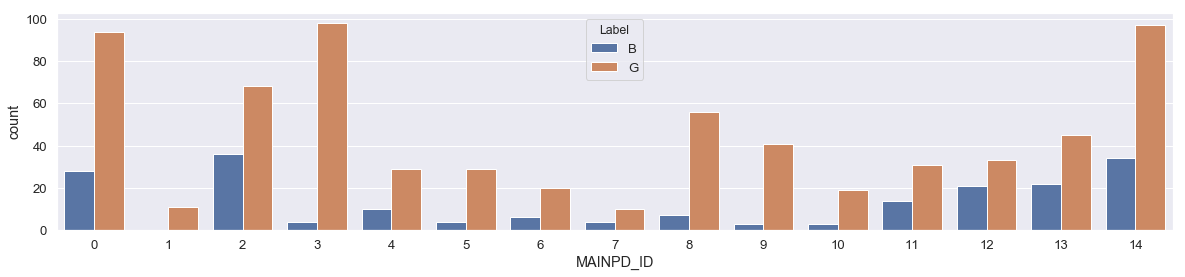

In [85]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(x['MAINPD_ID'], hue=y)

### Worse MainPD_ID:

In [86]:
list(LE2.inverse_transform([0,2,4,8,9,14]))

D:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['CE003PAMON',
 'CEBAKPA003',
 'CEPA003003',
 'CEPA003H10',
 'CEPA003H40',
 'CEPA07SPA1']

## 3.4 Recipe Study
The correlation of Recipe_SP & Label is **0.1224**

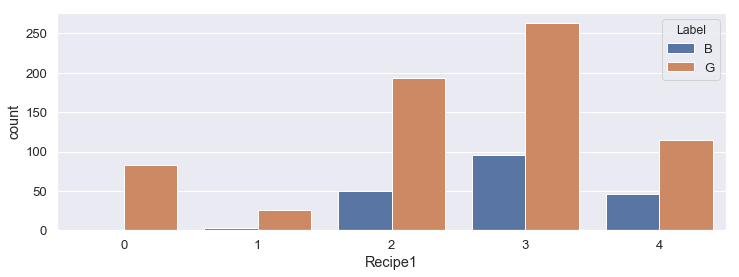

In [87]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x['Recipe1'], hue=y)

In [88]:
list(LE4.inverse_transform([0,1,2,3,4]))

D:\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


['DI1', 'DI2', 'DI3', 'DI4', 'DI5']

### Result: Recipe SP3 is better than SI_HSO

## 3.5 Usage Study
The correlation of Usage & Label is **0.0926**.

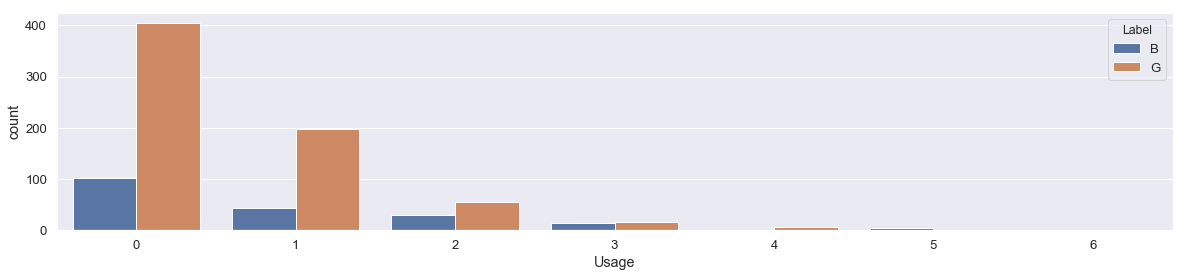

In [89]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(df['Usage'], hue=y)

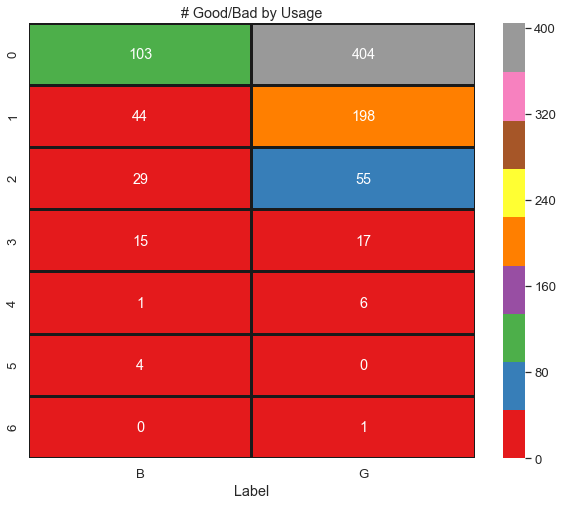

In [90]:
yc_fe = df[["Label","Usage"]]

plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(yc_fe["Label"],yc_fe["Usage"]).transpose(),
            annot=True,fmt="d",cmap=sns.color_palette("Set1"),linewidth=2,linecolor="k")

plt.ylabel("")
plt.title("# Good/Bad by Usage")
plt.show()

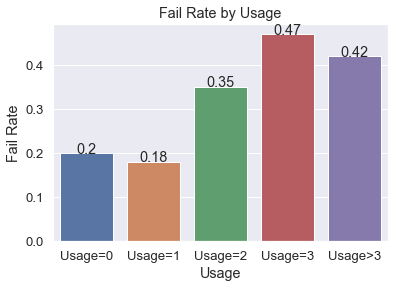

In [91]:
a = round(103/(404+103),2)
b = round(44/(198+44),2)
c = round(29/(55+29),2)
d = round(15/(17+15),2)
e = round(5/(7+5),2)
cols = ['Usage=0','Usage=1','Usage=2','Usage=3','Usage>3',]
failrate = [a,b,c,d,e]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, failrate, palette=pal)
ax.set(xlabel='Usage', ylabel='Fail Rate', title='Fail Rate by Usage')
for p, uniq in zip(ax.patches, failrate):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height,uniq,ha="center") 

### Usage>=2, the fail rate >35%

## 3.6 Venor Study
The correlation of Vendor & Label is **0.0714**.

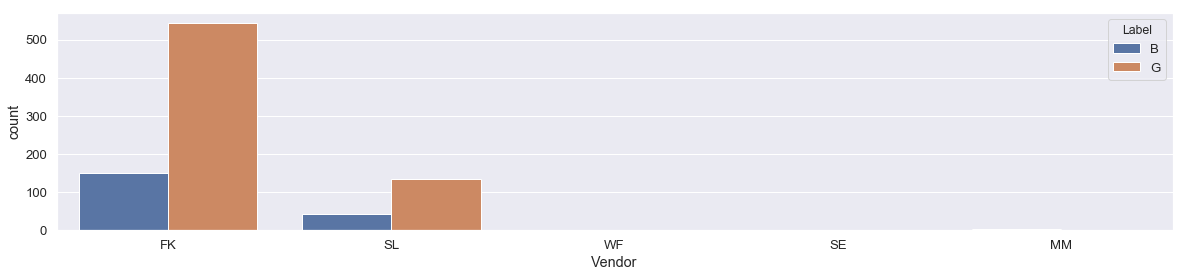

In [92]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(df['Vendor'], hue=y)

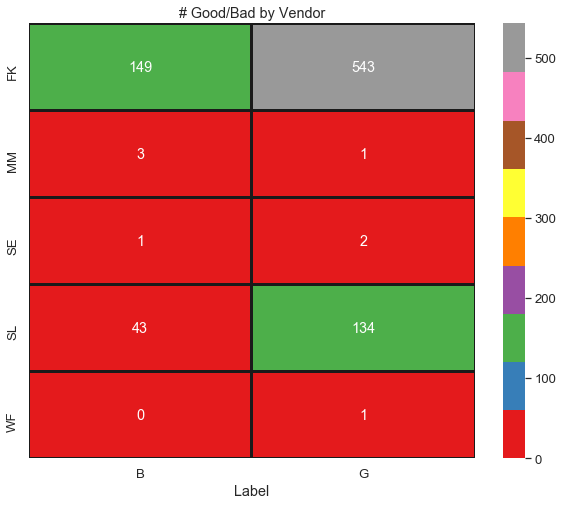

In [93]:
yc_fe = df[["Label","Vendor"]]

plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(yc_fe["Label"],yc_fe["Vendor"]).transpose(),
            annot=True,fmt="d",cmap=sns.color_palette("Set1"),linewidth=2,linecolor="k")

plt.ylabel("")
plt.title("# Good/Bad by Vendor")
plt.show()

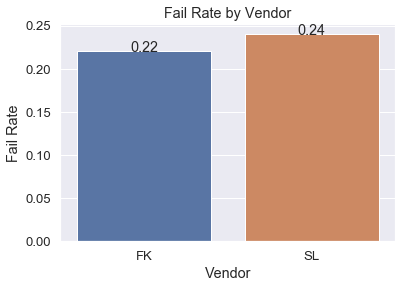

In [94]:
a = round(149/(149+543),2)
b = round(43/(43+134),2)
cols = ['FK','SL']
failrate = [a,b]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, failrate, palette=pal)
ax.set(xlabel='Vendor', ylabel='Fail Rate', title='Fail Rate by Vendor')
for p, uniq in zip(ax.patches, failrate):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height,uniq,ha="center") 

Result: FK/SK fail rate (22%, 24%) is equal to the totally fail rate (22.4%). So Vendor code is not significant factor of fail rate.

## 3.7 Recycle Study
New finding: 此route 可以使用4次 (recycle =3), 但是幾乎都用不到3次

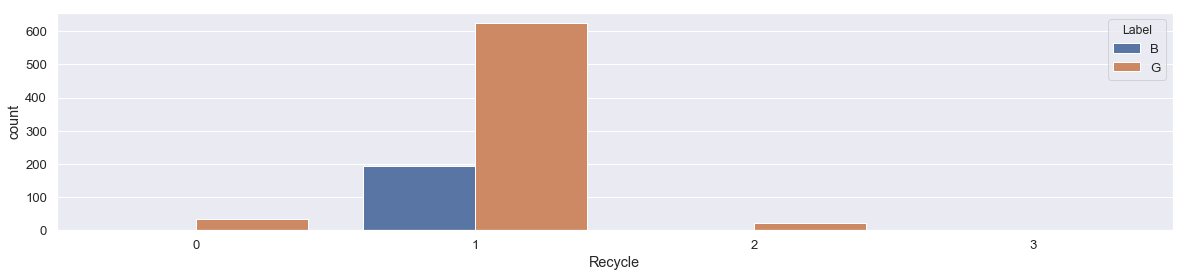

In [95]:
fig, ax = plt.subplots(figsize=(20,4))
sns.countplot(df['Recycle'], hue=y)

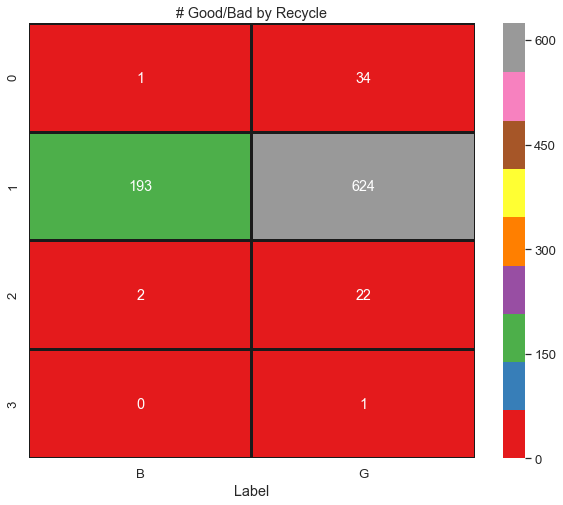

In [96]:
yc_fe = df[["Label","Recycle"]]

plt.figure(figsize=(10,8))
sns.heatmap(pd.crosstab(yc_fe["Label"],yc_fe["Recycle"]).transpose(),
            annot=True,fmt="d",cmap=sns.color_palette("Set1"),linewidth=2,linecolor="k")

plt.ylabel("")
plt.title("# Good/Bad by Recycle")
plt.show()

# 4. Model Training
Out of bag score is **79.36%**, Testing F-score is **84.48%**. Recore rate is **88.64%**.

In [51]:
y2 = df['Label'].values

In [52]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=100,
                             min_samples_split=12, #20
                             min_samples_leaf=1,
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1) 

rf.fit(x, y2) #filter SP data
print("Out Of Bag score is %.4f" % rf.oob_score_)

Out Of Bag score is 0.7936


In [53]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the data into training and testing sets with 20% test rate
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size = 0.2, random_state = 0)

D:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
# Training model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=101)
RFC.fit(X_train,y_train)

# Import 4 metrics from sklearn for testing
from sklearn.metrics import accuracy_score,precision_score,recall_score,fbeta_score
print ("Accuracy on testing data of RandomForestClassifier: {:.4f}".format(accuracy_score(y_test, RFC.predict(X_test))))

Accuracy on testing data of RandomForestClassifier: 0.7614


In [55]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, RFC.predict(X_test))

array([[ 16,  28],
       [ 14, 118]], dtype=int64)

In [56]:
tn, fp, fn, tp = confusion_matrix(y_test, RFC.predict(X_test)).ravel()

Accuracy = (tn+tp)/(tn+tp+fp+fn)
Precision = (tp)/(tp+fp)
Recall = tp/(tp+fn)
Fscore = (2*Precision*Recall)/(Precision+Recall)
print ("Accuracy on testing data of RandomForestClassifier: {:.4f}".format(Accuracy))
print ("Precision on testing data of RandomForestClassifier: {:.4f}".format(Precision))
print ("Recall on testing data of RandomForestClassifier: {:.4f}".format(Recall))
print ("F-score on testing data of RandomForestClassifier: {:.4f}".format(Fscore))

Accuracy on testing data of RandomForestClassifier: 0.7614
Precision on testing data of RandomForestClassifier: 0.8082
Recall on testing data of RandomForestClassifier: 0.8939
F-score on testing data of RandomForestClassifier: 0.8489


## Metric Introduction
<img style="float: left;" src="pic\1.png" width="30%">
<img style="float: left;" src="pic\2.png" width="40%">

## 5. Model Tuning

After model tuning, the F-score have been improved to **87.67%** from 84.48%,
the Recall rate have been improved to **96.97%** from 88.64%.

In [57]:
from sklearn.grid_search import GridSearchCV

D:\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [58]:
parameters = {'n_estimators':[10, 50, 100, 200, 400],
              'min_samples_split':[8,12,16,20],
              'min_samples_leaf':[1,2,3,4,5]
             }

In [59]:
grid = GridSearchCV(rf, parameters)
grid_fit = grid.fit(x, y2)

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob esti

In [60]:
# Get the estimator
best_rf = grid_fit.best_estimator_

In [61]:
best_rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=16,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [62]:
# Make predictions using the unoptimized and model
predictions_rf = (rf.fit(X_train, y_train)).predict(X_test)
best_predictions_rf = best_rf.predict(X_test)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, best_predictions_rf)

array([[ 14,  30],
       [  2, 130]], dtype=int64)

In [64]:
tn, fp, fn, tp = confusion_matrix(y_test, best_predictions_rf).ravel()

Accuracy = (tn+tp)/(tn+tp+fp+fn)
Precision = (tp)/(tp+fp)
Recall = tp/(tp+fn)
Fscore = (2*Precision*Recall)/(Precision+Recall)
print ("Accuracy on testing data of RandomForestClassifier: {:.4f}".format(Accuracy))
print ("Precision on testing data of RandomForestClassifier: {:.4f}".format(Precision))
print ("Recall on testing data of RandomForestClassifier: {:.4f}".format(Recall))
print ("F-score on testing data of RandomForestClassifier: {:.4f}".format(Fscore))

Accuracy on testing data of RandomForestClassifier: 0.8182
Precision on testing data of RandomForestClassifier: 0.8125
Recall on testing data of RandomForestClassifier: 0.9848
F-score on testing data of RandomForestClassifier: 0.8904


## Feature Importance of final model

D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


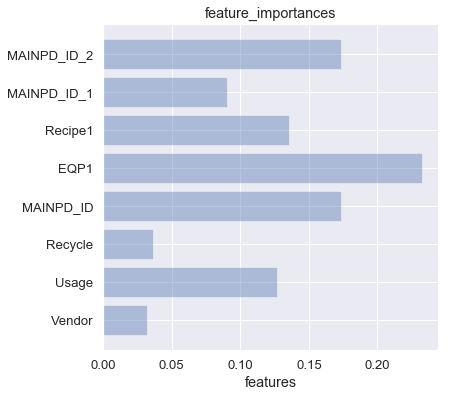

In [65]:
features2 = ['Vendor','Usage', 'Recycle', 'MAINPD_ID','EQP1','Recipe1','MAINPD_ID_1','MAINPD_ID_2']
best_rf.fit(x, y)
fig, ax = plt.subplots(figsize=(6,6))
y_pos = np.arange(len(features2))
plt.barh(y_pos, best_rf.feature_importances_, align='center', alpha=0.4)
plt.yticks(y_pos, x)
plt.xlabel('features')
plt.title('feature_importances')
plt.show()

# 6. Conclusion:
**EQP1 (SP tool)** has been change to the first importance feature after model turning. (model recall rate: 96.97%)
The sort of other feature have no change.

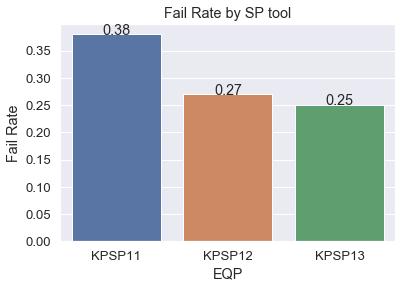

In [66]:
a = round(54/(54+90),2)
b = round(26/(26+70),2)
c = round(87/(87+264),2)

cols = ['KPSP11','KPSP12','KPSP13']
failrate = [a,b,c]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, failrate, palette=pal)
ax.set(xlabel='EQP', ylabel='Fail Rate', title='Fail Rate by SP tool')
for p, uniq in zip(ax.patches, failrate):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height,uniq,ha="center") 